# EDA of Heart disease data from Cleveland clinic
- Exploratory Data Analysis
- > https://archive-beta.ics.uci.edu/ml/datasets/heart+disease
- > https://towardsdatascience.com/heart-disease-prediction-73468d630cfc
- > https://betterprogramming.pub/predicting-heart-disease-with-a-neural-network-a48d2ce59bc5
- > https://medium.com/analytics-vidhya/cleveland-eda-b73f0f62ebf8

## 1. Importing Libraries

In [70]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## 2. Data Collection

In [71]:
# Get the data from github
url = "https://github.com/Redwoods/Py/raw/master/pdm2020/my-note/py-pandas/data/cleveland.csv"
df = pd.read_csv(url, header = None)
# df = pd.read_csv('cleveland_raw.csv', header=None)

In [72]:
df.shape,df.head(10)

((303, 14),
    0   1   2    3    4   5   6    7   8    9   10   11   12  13
 0  63   1   1  145  233   1   2  150   0  2.3   3  0.0  6.0   0
 1  67   1   4  160  286   0   2  108   1  1.5   2  3.0  3.0   2
 2  67   1   4  120  229   0   2  129   1  2.6   2  2.0  7.0   1
 3  37   1   3  130  250   0   0  187   0  3.5   3  0.0  3.0   0
 4  41   0   2  130  204   0   2  172   0  1.4   1  0.0  3.0   0
 5  56   1   2  120  236   0   0  178   0  0.8   1  0.0  3.0   0
 6  62   0   4  140  268   0   2  160   0  3.6   3  2.0  3.0   3
 7  57   0   4  120  354   0   0  163   1  0.6   1  0.0  3.0   0
 8  63   1   4  130  254   0   2  147   0  1.4   2  1.0  7.0   2
 9  53   1   4  140  203   1   2  155   1  3.1   3  0.0  7.0   1)

### columns using name of features

In [73]:
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol',
              'fbs', 'restecg', 'thalach', 'exang', 
              'oldpeak', 'slope', 'ca', 'thal', 'target']

df.head(15)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
5,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
6,62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,3
7,57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0
8,63,1,4,130,254,0,2,147,0,1.4,2,1.0,7.0,2
9,53,1,4,140,203,1,2,155,1,3.1,3,0.0,7.0,1


## Ckeck & cleaning data
- Check the presence of null or NaN
- target : (0 ~ 4) => (0,1), (1-4) was assigned as 1.

### Imputing data
- Check the NaN or missing values
- Impute the null data by the mean or median of the same feature

## target : (0 ~ 4) => (0,1), (1-4) was assigned as 1.

In [74]:
# https://jaaamj.tistory.com/112
df.target.unique(),df.target.nunique()

(array([0, 2, 1, 3, 4]), 5)

In [75]:
df.target.value_counts()

0    164
1     55
2     36
3     35
4     13
Name: target, dtype: int64

In [76]:
# target : (0 ~ 4) => (0,1), (1-4) was assigned as 1.
df['target'] = df.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})

In [77]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
5,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
6,62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,1
7,57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0
8,63,1,4,130,254,0,2,147,0,1.4,2,1.0,7.0,1
9,53,1,4,140,203,1,2,155,1,3.1,3,0.0,7.0,1


## CHECK for the null values & Imputing by the mean or median

In [78]:
# CHECK FOR NULL VALUES
df.isnull().values.any(), df.isna().sum()  # df.isnull().sum()

(True,
 age         0
 sex         0
 cp          0
 trestbps    0
 chol        0
 fbs         0
 restecg     0
 thalach     0
 exang       0
 oldpeak     0
 slope       0
 ca          4
 thal        2
 target      0
 dtype: int64)

In [79]:
df[df.thal.isnull()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
87,53,0,3,128,216,0,2,115,0,0.0,1,0.0,NaN,0
266,52,1,4,128,204,1,0,156,1,1.0,2,0.0,NaN,1


In [80]:
df[df['ca'].isnull()]   # df[df.ca.isnull()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
166,52,1,3,138,223,0,0,169,0,0.0,1,NaN,3.0,0
192,43,1,4,132,247,1,2,143,1,0.1,2,NaN,7.0,1
287,58,1,2,125,220,0,0,144,0,0.4,2,NaN,7.0,0
302,38,1,3,138,175,0,0,173,0,0.0,1,NaN,3.0,0


In [81]:
# Imputing data using the median
df['thal'] = df.thal.fillna(df.thal.median())
df['ca'] = df.ca.fillna(df.ca.median())

In [82]:
# reCHECK FOR NULL VALUES
df.isnull().values.any(), df.isna().sum()  # df.isnull().sum()

(False,
 age         0
 sex         0
 cp          0
 trestbps    0
 chol        0
 fbs         0
 restecg     0
 thalach     0
 exang       0
 oldpeak     0
 slope       0
 ca          0
 thal        0
 target      0
 dtype: int64)

In [83]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
5,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
6,62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,1
7,57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0
8,63,1,4,130,254,0,2,147,0,1.4,2,1.0,7.0,1
9,53,1,4,140,203,1,2,155,1,3.1,3,0.0,7.0,1


In [84]:
df.target.value_counts()

0    164
1    139
Name: target, dtype: int64

In [85]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

## Features of heart disease data
- age: displays the age of the individual.
- sex: displays the gender of the individual using the following format :
    - 1 = male
    - 0 = female
- cp: Chest-pain type: displays the type of chest-pain experienced by the individual using the following format :
    - 1 = typical angina (협심증)
    - 2 = atypical angina
    - 3 = non — anginal pain
    - 4 = asymptotic
- trestbps: Resting Blood Pressure: displays the resting blood pressure value of an individual in mmHg (unit)
- chol: Serum Cholestrol: displays the serum cholesterol in mg/dl (unit)
- fbs: Fasting Blood Sugar: compares the fasting blood sugar value of an individual with 120mg/dl.
    - If fasting blood sugar > 120mg/dl then : 1 (true)
    
    - else : 0 (false)
- restecg: Resting ECG : displays resting electrocardiographic results
    - 0 = normal
    - 1 = having ST-T wave abnormality
    - 2 = left ventricular hyperthrophy
- thalach: Max heart rate achieved : displays the max heart rate achieved by an individual.
- exang: Exercise induced angina(협심증) :
    - 1 = yes
    - 0 = no
- oldpeak: ST depression induced by exercise relative to rest: displays the value which is an integer or float.
- slope: Peak exercise ST segment :
    - 1 = upsloping
    - 2 = flat
    - 3 = downsloping
- ca: Number of major vessels (0–3) colored by flourosopy : displays the value as integer or float.
- thal : displays the thalassemia (빈혈) :
    - 3 = normal
    - 6 = fixed defect
    - 7 = reversible defect
- target: Diagnosis of heart disease : Displays whether the individual is suffering from heart disease or not :
    - 0 = absence
    - 1 = present. (1,2,3,4 => 1)

---

## 중복 데이터 점검
- duplicated()
- https://pydole.tistory.com/entry/Python-pandas-%EC%A4%91%EB%B3%B5%EA%B0%92-%EC%B2%98%EB%A6%AC-duplicates-dropduplicates

In [86]:
df.duplicated().sum()

0

In [87]:
df[df.duplicated(keep=False)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [88]:
# 중복 샘플을 제거
df.drop_duplicates(subset=df.columns, inplace=True) # 열 전체에서 동일한 중복인 내용이 있다면 중복 제거

# 중복 샘플을 제거 후, 전체 샘플 수를 확인.
print('총 샘플의 수 :',len(df))

총 샘플의 수 : 303


> ## 최종 데이터 확정 및 저장

In [89]:
# df.to_csv('heart.csv', index=False)

## 3. Explore Data

In [90]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.663366,4.722772,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,1.938383,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


In [91]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.438944,9.038662,29.0,48.0,56.0,61.0,77.0
sex,303.0,0.679868,0.467299,0.0,0.0,1.0,1.0,1.0
cp,303.0,3.158416,0.960126,1.0,3.0,3.0,4.0,4.0
trestbps,303.0,131.689769,17.599748,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.693069,51.776918,126.0,211.0,241.0,275.0,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.990099,0.994971,0.0,0.0,1.0,2.0,2.0
thalach,303.0,149.607261,22.875003,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    float64
 12  thal      303 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 35.5 KB


### Check the balance of classes in the data through plot

In [93]:
classes=df.target
classes.value_counts(), type(classes)

(0    164
 1    139
 Name: target, dtype: int64,
 pandas.core.series.Series)

In [94]:
classes.value_counts(ascending=True)

1    139
0    164
Name: target, dtype: int64

False: non-Heart Disease 164
True: Heart Disease 139


/Users/gayoonkim/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


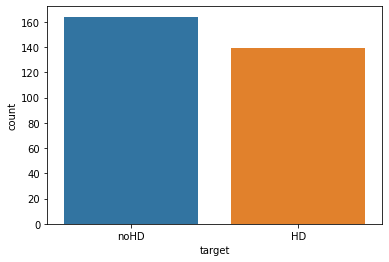

In [95]:
# Check the balance of the data through plot
classes=df.target
ax=sns.countplot(classes, label='count')
ax.set_xticklabels(['noHD','HD'])
noHD,HD=classes.value_counts() #ascending=True)
print('False: non-Heart Disease',noHD)
print('True: Heart Disease',HD)

In [96]:
### 1 = male, 0 = female
# df['sex'] = df.sex.map({0: 'female', 1: 'male'})

In [97]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,1
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,1
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
302,38,1,3,138,175,0,0,173,0,0.0,1,0.0,3.0,0


In [98]:
# # barplot of age vs sex with hue = target
# sns.catplot(kind = 'bar', data = df, y = 'age', x = 'sex', hue = 'target', hue_order=[1,0])#, color='br') #order = df['target'].sort_values().unique())
# plt.title('Distribution of age vs sex with the target class')
# plt.show()

***

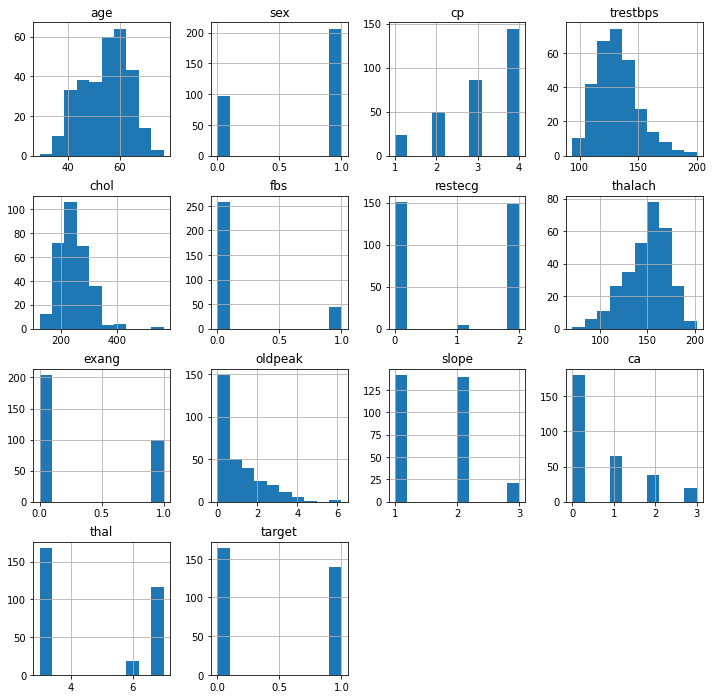

In [99]:
# plot histograms for each variable
df.hist(figsize = (12, 12))
plt.show()

## DIY : 특징 사이의 상관성을 조사하시오.

In [100]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.097542,0.104139,0.284946,0.208950,0.118530,0.148868,-0.393806,0.091661,0.203805,0.161770,0.365323,0.128303,0.223120
sex,-0.097542,1.000000,0.010084,-0.064456,-0.199915,0.047862,0.021647,-0.048663,0.146201,0.102173,0.037533,0.086048,0.380581,0.276816
cp,0.104139,0.010084,1.000000,-0.036077,0.072319,-0.039975,0.067505,-0.334422,0.384060,0.202277,0.152050,0.233117,0.262089,0.414446
trestbps,0.284946,-0.064456,-0.036077,1.000000,0.130120,0.175340,0.146560,-0.045351,0.064762,0.189171,0.117382,0.097528,0.134424,0.150825
chol,0.208950,-0.199915,0.072319,0.130120,1.000000,0.009841,0.171043,-0.003432,0.061310,0.046564,-0.004062,0.123726,0.018351,0.085164
fbs,0.118530,0.047862,-0.039975,0.175340,0.009841,1.000000,0.069564,-0.007854,0.025665,0.005747,0.059894,0.140764,0.064625,0.025264
restecg,0.148868,0.021647,0.067505,0.146560,0.171043,0.069564,1.000000,-0.083389,0.084867,0.114133,0.133946,0.131749,0.024325,0.169202
thalach,-0.393806,-0.048663,-0.334422,-0.045351,-0.003432,-0.007854,-0.083389,1.000000,-0.378103,-0.343085,-0.385601,-0.265699,-0.274142,-0.417167
exang,0.091661,0.146201,0.384060,0.064762,0.061310,0.025665,0.084867,-0.378103,1.000000,0.288223,0.257748,0.145788,0.325240,0.431894
oldpeak,0.203805,0.102173,0.202277,0.189171,0.046564,0.005747,0.114133,-0.343085,0.288223,1.000000,0.577537,0.301067,0.342405,0.424510


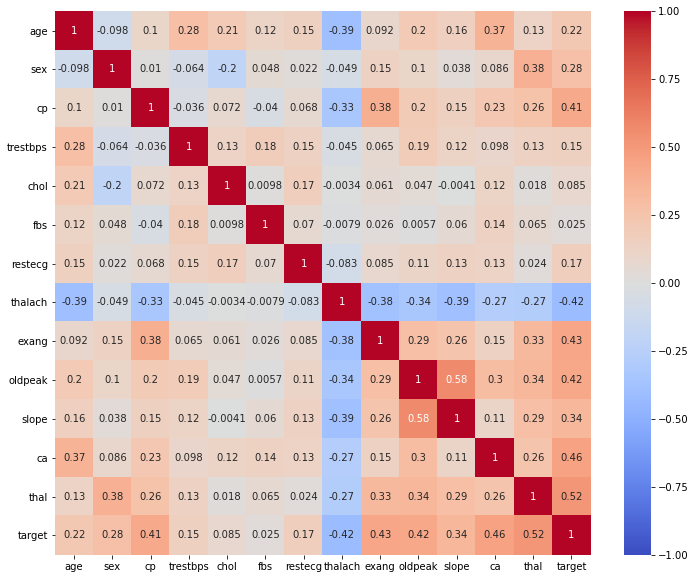

In [101]:
# correlation plot of df

plt.figure(figsize=(12,10))
g=sns.heatmap(df.corr(),annot=True,cmap='coolwarm', #cmap= "RdYlGn",
             vmin=-1, vmax=1)

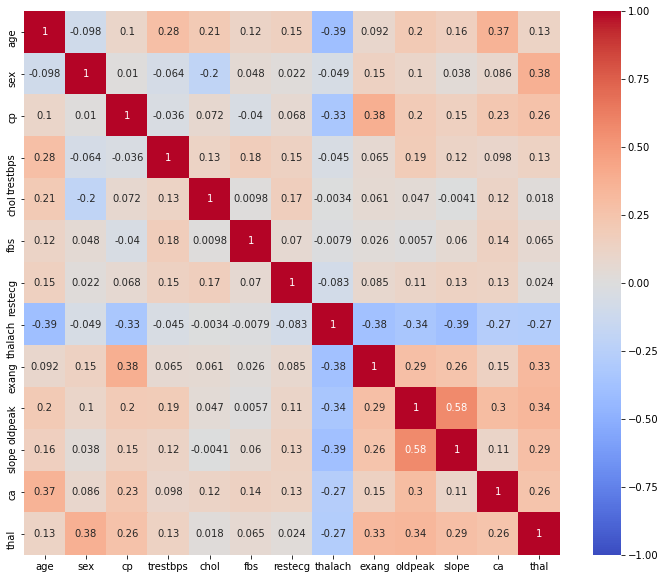

In [102]:
# correlation plot of df.iloc[:,:-1]

plt.figure(figsize=(12,10))
g=sns.heatmap(df.iloc[:,:-1].corr(),annot=True,cmap='coolwarm', #cmap= "RdYlGn",
             vmin=-1, vmax=1)

***

# df를 streamlit wepapp에 이용.

---

### 상관성 분석 결과

> ### **[DIY] 상관성, 반상관성이 높은 변수들에 대한 좀 더 자세한 시각화가 필요하다.**

### [DIY] 상관성/반상관성이 높은 변수들에 대한 좀 더 자세한 시각화를 웹앱에 추가.
![](https://github.com/Redwoods/Py/blob/master/pdm2020/my-note/py-pandas/data/heart_corr.png?raw=true)

# 중간 실기 시험 파일 제출
0. 제출 파일명: heart_EDA_pdmnn.py   (nn 은 id)
1. github의 'pdmnn' repo 내의 py-streamlit/st-mid-exam 폴더에 제출.
2. 제출이 끝나면 chaos21@gmail.com 으로 파일을 한번 더 제출. (제출 시간 결정)